# Initial code

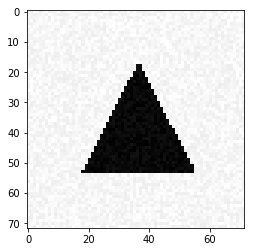

In [2]:
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]




# Simple classifier

In [3]:
#Generate training set for the simple classifier
from keras.utils import np_utils
[X_train, Y_train] = generate_dataset_classification(300, 20)
#convert Y_train to be compatible with the model
Y_train=np_utils.to_categorical(Y_train)

Using TensorFlow backend.


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [5]:
# using stochastic gradient descent optimizer
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
nb_neurons = 3
SGD_model = Sequential([Dense(nb_neurons, input_dim=X_train.shape[1]),Activation('sigmoid')])
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.5,nesterov=True)
SGD_model.compile(loss='mean_squared_error',optimizer=sgd,metrics=['accuracy'])
SGD_model.fit(X_train, Y_train, epochs=30, batch_size=30)

Epoch 1/30
300/300 [==============================] - 1s 4ms/step - loss: 0.2305 - acc: 0.3800
Epoch 2/30
300/300 [==============================] - 0s 208us/step - loss: 0.1864 - acc: 0.5733
Epoch 3/30
300/300 [==============================] - 0s 260us/step - loss: 0.1586 - acc: 0.7033
Epoch 4/30
300/300 [==============================] - 0s 260us/step - loss: 0.1605 - acc: 0.6467
Epoch 5/30
300/300 [==============================] - 0s 260us/step - loss: 0.1264 - acc: 0.7833
Epoch 6/30
300/300 [==============================] - 0s 208us/step - loss: 0.1245 - acc: 0.7867
Epoch 7/30
300/300 [==============================] - 0s 156us/step - loss: 0.1096 - acc: 0.8233
Epoch 8/30
300/300 [==============================] - 0s 208us/step - loss: 0.1087 - acc: 0.7933
Epoch 9/30
300/300 [==============================] - 0s 208us/step - loss: 0.1029 - acc: 0.8067
Epoch 10/30
300/300 [==============================] - 0s 260us/step - loss: 0.1054 - acc: 0.7967
Epoch 11/30
300/300 [==========

In [12]:
# testing the SGD  model 
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
SGD_model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

In [29]:
#using Adam optimizer
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

nb_neurons = 3
Adam_model = Sequential([Dense(nb_neurons, input_dim=X_train.shape[1]),Activation('sigmoid')])
Adam_model.add(Activation("tanh"))
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
Adam_model.compile(loss='mean_squared_error',optimizer=adam,metrics=['accuracy'])
Adam_model.fit(X_train, Y_train, epochs=20, batch_size=30)


Epoch 1/20
300/300 [==============================] - 1s 5ms/step - loss: 0.2749 - acc: 0.4900
Epoch 2/20
300/300 [==============================] - 0s 312us/step - loss: 0.1825 - acc: 0.6133
Epoch 3/20
300/300 [==============================] - 0s 313us/step - loss: 0.1283 - acc: 0.8000 0s - loss: 0.1301 - acc: 0.803
Epoch 4/20
300/300 [==============================] - 0s 312us/step - loss: 0.1024 - acc: 0.8200
Epoch 5/20
300/300 [==============================] - 0s 365us/step - loss: 0.0928 - acc: 0.8467
Epoch 6/20
300/300 [==============================] - 0s 260us/step - loss: 0.0812 - acc: 0.8767
Epoch 7/20
300/300 [==============================] - 0s 312us/step - loss: 0.0782 - acc: 0.8833
Epoch 8/20
300/300 [==============================] - 0s 365us/step - loss: 0.0665 - acc: 0.9467
Epoch 9/20
300/300 [==============================] - ETA: 0s - loss: 0.0684 - acc: 0.904 - 0s 260us/step - loss: 0.0664 - acc: 0.9200
Epoch 10/20
300/300 [==============================] - 0s 31

The Adam optimize does not converge correctly in some cases. There is a propably a local optimum where loss function is 0.13

In [30]:
# testing the Adam model 
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
Adam_model.predict(X_test)

array([[0.       , 0.7615942, 0.       ]], dtype=float32)

# Visualization of the solution

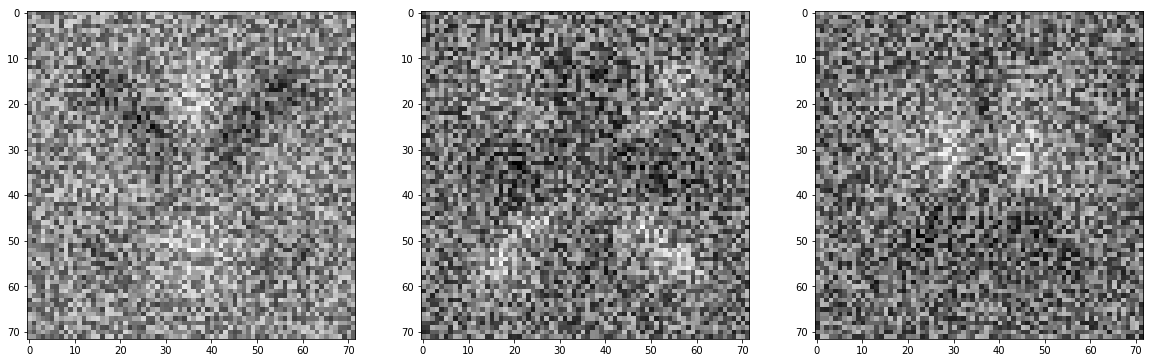

In [31]:
Column1=SGD_model.get_weights()[0][:,0]
Column2=SGD_model.get_weights()[0][:,1]
Column3=SGD_model.get_weights()[0][:,2]
fig,(ax0,ax1,ax2)=plt.subplots(ncols=3,figsize=(20,20))
ax0.imshow(Column1.reshape(72,72),cmap='gray')
ax1.imshow(Column2.reshape(72,72),cmap='gray')
ax2.imshow(Column3.reshape(72,72),cmap='gray')

Visualization of Adam model

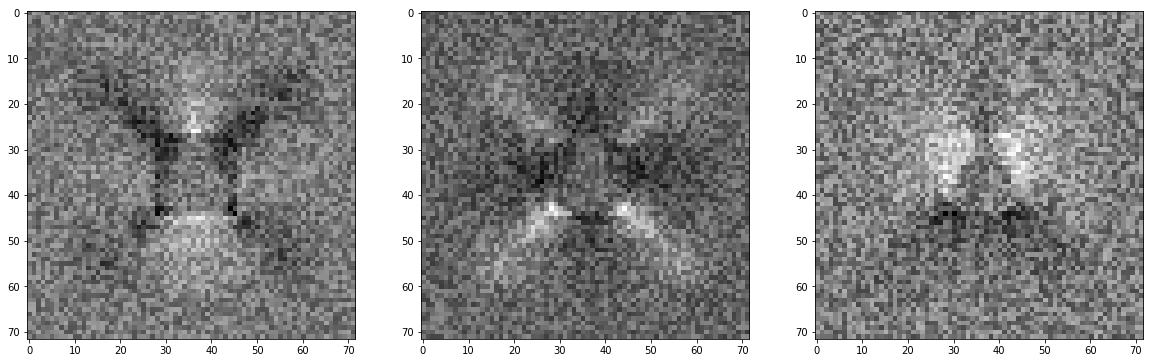

In [32]:
Column1=Adam_model.get_weights()[0][:,0]
Column2=Adam_model.get_weights()[0][:,1]
Column3=Adam_model.get_weights()[0][:,2]
fig,(ax0,ax1,ax2)=plt.subplots(ncols=3,figsize=(20,20))
ax0.imshow(Column1.reshape(72,72),cmap='gray')
ax1.imshow(Column2.reshape(72,72),cmap='gray')
ax2.imshow(Column3.reshape(72,72),cmap='gray')

# A More Dificult Classification Problem

In [33]:
#Generate dataset
[X_train_2, Y_train_2] = generate_dataset_classification(300, 20,True)
#convert Y_train to be compatible with the model
Y_train_2=np_utils.to_categorical(Y_train_2)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [34]:
#using Adam optimizer
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

#define the model
nb_neurons = 3
Adam_model_2 = Sequential([Dense(nb_neurons, input_dim=X_train.shape[1]),Activation('sigmoid')])
Adam_model_2.add(Activation("tanh"))
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
Adam_model_2.compile(loss='mean_squared_error',optimizer=adam,metrics=['accuracy'])

#retrain the linear classifier
Adam_model_2.fit(X_train_2, Y_train_2, epochs=30, batch_size=30)

Epoch 1/30
300/300 [==============================] - 2s 7ms/step - loss: 0.3138 - acc: 0.3400
Epoch 2/30
300/300 [==============================] - 0s 312us/step - loss: 0.3324 - acc: 0.3500
Epoch 3/30
300/300 [==============================] - 0s 260us/step - loss: 0.3328 - acc: 0.4067
Epoch 4/30
300/300 [==============================] - 0s 260us/step - loss: 0.3340 - acc: 0.3433
Epoch 5/30
300/300 [==============================] - 0s 260us/step - loss: 0.3506 - acc: 0.3433
Epoch 6/30
300/300 [==============================] - 0s 260us/step - loss: 0.3114 - acc: 0.3900
Epoch 7/30
300/300 [==============================] - 0s 208us/step - loss: 0.2675 - acc: 0.4167
Epoch 8/30
300/300 [==============================] - 0s 260us/step - loss: 0.2421 - acc: 0.4733
Epoch 9/30
300/300 [==============================] - 0s 208us/step - loss: 0.2362 - acc: 0.5167
Epoch 10/30
300/300 [==============================] - 0s 208us/step - loss: 0.2397 - acc: 0.5167
Epoch 11/30
300/300 [==========

In [35]:
# using stochastic gradient descent optimizer
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

#define the model
nb_neurons = 3
SGD_model_2 = Sequential([Dense(nb_neurons, input_dim=X_train.shape[1]),Activation('sigmoid')])
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.5,nesterov=True)
SGD_model_2.compile(loss='mean_squared_error',optimizer=sgd,metrics=['accuracy'])

#retrain the linear classifier
SGD_model.fit(X_train_2, Y_train_2, epochs=30, batch_size=30)

Epoch 1/30
300/300 [==============================] - 1s 4ms/step - loss: 0.2857 - acc: 0.3567
Epoch 2/30
300/300 [==============================] - 0s 312us/step - loss: 0.2731 - acc: 0.4000
Epoch 3/30
300/300 [==============================] - 0s 260us/step - loss: 0.2778 - acc: 0.3900
Epoch 4/30
300/300 [==============================] - 0s 208us/step - loss: 0.2607 - acc: 0.3867
Epoch 5/30
300/300 [==============================] - 0s 208us/step - loss: 0.2577 - acc: 0.4033
Epoch 6/30
300/300 [==============================] - 0s 208us/step - loss: 0.2609 - acc: 0.4000
Epoch 7/30
300/300 [==============================] - 0s 208us/step - loss: 0.2498 - acc: 0.3867
Epoch 8/30
300/300 [==============================] - 0s 208us/step - loss: 0.2466 - acc: 0.4600
Epoch 9/30
300/300 [==============================] - 0s 208us/step - loss: 0.2367 - acc: 0.4100
Epoch 10/30
300/300 [==============================] - 0s 208us/step - loss: 0.2323 - acc: 0.4367
Epoch 11/30
300/300 [==========

In [36]:
#Generate a dataset for the test
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [37]:
#Testing the linear classifier (SGD model)
SGD_model_2.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 1ms/step


[0.30472839951515196, 0.34000000009934106]

In [38]:
#Testing the linear classifier(Adam model)
Adam_model_2.evaluate(X_test, Y_test)

300/300 [==============================] - 1s 3ms/step


[0.23891099989414216, 0.38333333253860474]

# Convolutional Neural Network

In [39]:
[X_train_CNN, Y_train_CNN] = generate_dataset_classification(1000, 20, True)
X_train_CNN = X_train_CNN.reshape(1000,72,72,1)
Y_train_CNN = np_utils.to_categorical(Y_train_CNN, 3)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [40]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

# Train a covolutional neural network with a 16 5x5 filters
CNN_model = Sequential([Conv2D(filters=16, kernel_size=(5, 5), padding="same",input_shape=(72, 72, 1))])

# Add a MaxPooling 
CNN_model.add(MaxPooling2D(pool_size=(2,2)))
CNN_model.add(Flatten())
CNN_model.add(Dense(3, activation ='softmax'))
CNN_model.add(Activation('relu'))
CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN_model.fit(X_train_CNN, Y_train_CNN, epochs=10, batch_size=32, validation_split=0.1)


Train on 900 samples, validate on 100 samples
Epoch 1/10
900/900 [==============================] - 8s 9ms/step - loss: 1.3540 - acc: 0.3844 - val_loss: 0.9641 - val_acc: 0.4900
Epoch 2/10
900/900 [==============================] - 5s 6ms/step - loss: 0.8705 - acc: 0.6467 - val_loss: 0.8367 - val_acc: 0.6600
Epoch 3/10
900/900 [==============================] - 5s 6ms/step - loss: 0.7845 - acc: 0.6722 - val_loss: 1.0107 - val_acc: 0.4800
Epoch 4/10
900/900 [==============================] - 5s 6ms/step - loss: 0.7391 - acc: 0.6911 - val_loss: 0.7622 - val_acc: 0.7000
Epoch 5/10
900/900 [==============================] - 5s 6ms/step - loss: 0.6330 - acc: 0.7711 - val_loss: 0.7288 - val_acc: 0.6800
Epoch 6/10
900/900 [==============================] - 5s 6ms/step - loss: 0.5782 - acc: 0.7978 - val_loss: 0.6762 - val_acc: 0.7100
Epoch 7/10
900/900 [==============================] - 5s 6ms/step - loss: 0.5346 - acc: 0.8056 - val_loss: 0.7195 - val_acc: 0.7100
Epoch 8/10
900/900 [==========

In [41]:
#reshaping the X_test to be compatible with the model
X_test_CNN = X_test.reshape(300,72,72,1)
Y_test_CNN = Y_test

In [42]:
CNN_model.evaluate(X_test_CNN, Y_test_CNN)

300/300 [==============================] - 1s 3ms/step


[0.5567932295799255, 0.826666665871938]

With the CNN model, the loss is 0.55 and the accuracy is 83%. So with this classifier, we were able to increase the accuracy from 38% to 83%.

# A Regression Problem

In [43]:
[X_reg, Y_reg] = generate_dataset_regression(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


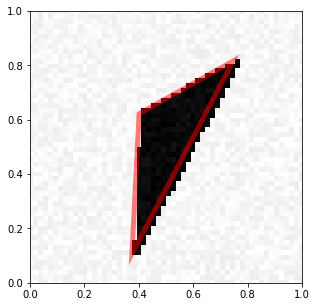

In [46]:
visualize_prediction(X_reg[0], Y_reg[0])

In [105]:
#reshaping Y_reg to contain the location of the vertices in this format : [[x1,y1],[x2,y2],[x3,y3]]. The result is stored in XY_reg
XY_reg = Y_reg.reshape(300,3,2)

In [98]:
#training a CNN 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

# Train a covolutional neural network with a 16 5x5 filters
CNN_model_vert = Sequential([Conv2D(filters=16, kernel_size=(5, 5), padding="same",input_shape=(72,72,1))])

# Add a MaxPooling 
CNN_model_vert.add(MaxPooling2D(pool_size=(2,2)))
CNN_model_vert.add(Flatten())
CNN_model_vert.add(Dense(3, activation ='softmax'))
CNN_model_vert.add(Activation('relu'))
CNN_model_vert.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN_model_vert.fit(X_reg, XY_reg, epochs=10, batch_size=32, validation_split=0.1)

ValueError: Error when checking target: expected activation_42 to have 2 dimensions, but got array with shape (300, 3, 2)